In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('../my_features.csv')

In [3]:
data.head()

,label,filename,WS_BGR_CH0_LH_std,WS_BGR_CH0_LH_mean,WS_BGR_CH0_HL_std,WS_BGR_CH0_HL_mean,WS_BGR_CH0_HH_std,WS_BGR_CH0_HH_mean,WS_BGR_CH1_LH_std,WS_BGR_CH1_LH_mean,...,LBP_GRAY_CH0_SC24+3_COUNTBINS26_NUMBIN16,LBP_GRAY_CH0_SC24+3_COUNTBINS26_NUMBIN17,LBP_GRAY_CH0_SC24+3_COUNTBINS26_NUMBIN18,LBP_GRAY_CH0_SC24+3_COUNTBINS26_NUMBIN19,LBP_GRAY_CH0_SC24+3_COUNTBINS26_NUMBIN20,LBP_GRAY_CH0_SC24+3_COUNTBINS26_NUMBIN21,LBP_GRAY_CH0_SC24+3_COUNTBINS26_NUMBIN22,LBP_GRAY_CH0_SC24+3_COUNTBINS26_NUMBIN23,LBP_GRAY_CH0_SC24+3_COUNTBINS26_NUMBIN24,LBP_GRAY_CH0_SC24+3_COUNTBINS26_NUMBIN25
0,1,AA5742_id154_s0_112.png,2.024784,1.435971,1.999711,1.552271,0.518205,0.387795,2.034412,1.345293,...,0.033834,0.030307,0.020500,0.019596,0.017245,0.013764,0.011819,0.005726,0.040108,0.144682
1,1,AAE5573GP98K_id159_s0_118.png,2.222853,1.351828,2.428339,1.370990,0.732518,0.449193,2.223606,1.351927,...,0.036165,0.032282,0.021212,0.018614,0.016375,0.015316,0.013865,0.008434,0.043990,0.202373
2,1,FT1080P_id165_s0_105.png,2.625385,2.109688,2.555435,1.911423,0.600128,0.487098,2.338574,1.386494,...,0.035798,0.033943,0.025178,0.023839,0.021765,0.018839,0.015370,0.008701,0.062173,0.208479
3,1,FT720P_id1_s0_105.png,4.556735,2.009469,5.029744,2.036808,1.092331,0.625332,4.709359,1.976732,...,0.020698,0.021883,0.016993,0.018430,0.020324,0.021863,0.024846,0.014501,0.090978,0.284032
4,1,FT720P_id2_s0_105.png,8.117490,3.499210,8.801603,3.953776,2.284051,1.071623,8.273653,3.515972,...,0.025473,0.026220,0.017613,0.016914,0.018112,0.019423,0.020538,0.013533,0.105907,0.220126


In [4]:
from sklearn.feature_selection import f_classif
from sklearn.preprocessing import  MinMaxScaler

X = data.drop(columns=['filename', 'label' ])
y = data.label

Посмотрим на корреляцию признаков:

In [5]:
corr = X.corr().abs()
sol = (corr.where(np.triu(np.ones(corr.shape), k=1).astype(np.bool))
                  .stack()
                  .sort_values(ascending=False))
sol[:20]

LBP_HSV_CH0_SC8+1_COUNTBINS10_NUMBIN6   LBP_HSV_CH0_SC8+1_COUNTBINS26_NUMBIN6     1.0
LBP_YCR_CH1_SC8+1_COUNTBINS10_NUMBIN4   LBP_YCR_CH1_SC8+1_COUNTBINS26_NUMBIN4     1.0
LBP_HSV_CH0_SC8+1_COUNTBINS10_NUMBIN1   LBP_HSV_CH0_SC8+1_COUNTBINS26_NUMBIN1     1.0
LBP_HSV_CH1_SC8+1_COUNTBINS10_NUMBIN9   LBP_HSV_CH1_SC8+1_COUNTBINS26_NUMBIN9     1.0
LBP_BGR_CH1_SC8+1_COUNTBINS10_NUMBIN6   LBP_BGR_CH1_SC8+1_COUNTBINS26_NUMBIN6     1.0
LBP_YCR_CH0_SC8+1_COUNTBINS10_NUMBIN3   LBP_YCR_CH0_SC8+1_COUNTBINS26_NUMBIN3     1.0
LBP_GRAY_CH0_SC8+1_COUNTBINS10_NUMBIN7  LBP_GRAY_CH0_SC8+1_COUNTBINS26_NUMBIN7    1.0
LBP_BGR_CH2_SC8+1_COUNTBINS10_NUMBIN7   LBP_BGR_CH2_SC8+1_COUNTBINS26_NUMBIN7     1.0
LBP_HSV_CH0_SC8+1_COUNTBINS10_NUMBIN8   LBP_HSV_CH0_SC8+1_COUNTBINS26_NUMBIN8     1.0
LBP_BGR_CH2_SC8+1_COUNTBINS10_NUMBIN3   LBP_BGR_CH2_SC8+1_COUNTBINS26_NUMBIN3     1.0
LBP_GRAY_CH0_SC8+1_COUNTBINS10_NUMBIN0  LBP_GRAY_CH0_SC8+1_COUNTBINS26_NUMBIN0    1.0
LBP_YCR_CH0_SC8+1_COUNTBINS10_NUMBIN8   LBP_YCR_CH0_SC

Найдем пары признаков, корреляция которых равна единице:

In [6]:
corr_feat_1 = []
corr_feat_2 = []
for feat1, feat2 in sol[sol==1].index:
    corr_feat_1.append(feat1)
    corr_feat_2.append(feat2)
print(corr_feat_1)
print(corr_feat_2)

['LBP_HSV_CH0_SC8+1_COUNTBINS10_NUMBIN6', 'LBP_YCR_CH1_SC8+1_COUNTBINS10_NUMBIN4', 'LBP_HSV_CH0_SC8+1_COUNTBINS10_NUMBIN1', 'LBP_HSV_CH1_SC8+1_COUNTBINS10_NUMBIN9', 'LBP_BGR_CH1_SC8+1_COUNTBINS10_NUMBIN6', 'LBP_YCR_CH0_SC8+1_COUNTBINS10_NUMBIN3', 'LBP_GRAY_CH0_SC8+1_COUNTBINS10_NUMBIN7', 'LBP_BGR_CH2_SC8+1_COUNTBINS10_NUMBIN7', 'LBP_HSV_CH0_SC8+1_COUNTBINS10_NUMBIN8', 'LBP_BGR_CH2_SC8+1_COUNTBINS10_NUMBIN3', 'LBP_GRAY_CH0_SC8+1_COUNTBINS10_NUMBIN0', 'LBP_YCR_CH0_SC8+1_COUNTBINS10_NUMBIN8', 'LBP_YCR_CH1_SC8+1_COUNTBINS10_NUMBIN8', 'LBP_BGR_CH0_SC8+1_COUNTBINS10_NUMBIN4', 'LBP_HSV_CH1_SC8+1_COUNTBINS10_NUMBIN1', 'LBP_GRAY_CH0_SC8+1_COUNTBINS10_NUMBIN4', 'LBP_YCR_CH2_SC8+1_COUNTBINS10_NUMBIN7', 'LBP_BGR_CH0_SC8+1_COUNTBINS10_NUMBIN5', 'LBP_HSV_CH0_SC8+1_COUNTBINS10_NUMBIN4', 'LBP_YCR_CH1_SC8+1_COUNTBINS10_NUMBIN5', 'LBP_BGR_CH0_SC8+1_COUNTBINS10_NUMBIN3', 'LBP_HSV_CH2_SC8+1_COUNTBINS10_NUMBIN9', 'LBP_BGR_CH0_SC8+1_COUNTBINS10_NUMBIN8', 'LBP_BGR_CH1_SC8+1_COUNTBINS10_NUMBIN3', 'LBP_BGR_CH0

Удаляем один из двух векторов признаков с корреляцией = 1.0

In [7]:
X.drop(columns=corr_feat_1, inplace=True)

In [8]:
X

,WS_BGR_CH0_LH_std,WS_BGR_CH0_LH_mean,WS_BGR_CH0_HL_std,WS_BGR_CH0_HL_mean,WS_BGR_CH0_HH_std,WS_BGR_CH0_HH_mean,WS_BGR_CH1_LH_std,WS_BGR_CH1_LH_mean,WS_BGR_CH1_HL_std,WS_BGR_CH1_HL_mean,...,LBP_GRAY_CH0_SC24+3_COUNTBINS26_NUMBIN16,LBP_GRAY_CH0_SC24+3_COUNTBINS26_NUMBIN17,LBP_GRAY_CH0_SC24+3_COUNTBINS26_NUMBIN18,LBP_GRAY_CH0_SC24+3_COUNTBINS26_NUMBIN19,LBP_GRAY_CH0_SC24+3_COUNTBINS26_NUMBIN20,LBP_GRAY_CH0_SC24+3_COUNTBINS26_NUMBIN21,LBP_GRAY_CH0_SC24+3_COUNTBINS26_NUMBIN22,LBP_GRAY_CH0_SC24+3_COUNTBINS26_NUMBIN23,LBP_GRAY_CH0_SC24+3_COUNTBINS26_NUMBIN24,LBP_GRAY_CH0_SC24+3_COUNTBINS26_NUMBIN25
0,2.024784,1.435971,1.999711,1.552271,0.518205,0.387795,2.034412,1.345293,2.030264,1.510959,...,0.033834,0.030307,0.020500,0.019596,0.017245,0.013764,0.011819,0.005726,0.040108,0.144682
1,2.222853,1.351828,2.428339,1.370990,0.732518,0.449193,2.223606,1.351927,2.429733,1.371130,...,0.036165,0.032282,0.021212,0.018614,0.016375,0.015316,0.013865,0.008434,0.043990,0.202373
2,2.625385,2.109688,2.555435,1.911423,0.600128,0.487098,2.338574,1.386494,2.465361,1.402123,...,0.035798,0.033943,0.025178,0.023839,0.021765,0.018839,0.015370,0.008701,0.062173,0.208479
3,4.556735,2.009469,5.029744,2.036808,1.092331,0.625332,4.709359,1.976732,5.107475,1.982092,...,0.020698,0.021883,0.016993,0.018430,0.020324,0.021863,0.024846,0.014501,0.090978,0.284032
4,8.117490,3.499210,8.801603,3.953776,2.284051,1.071623,8.273653,3.515972,8.976819,3.941580,...,0.025473,0.026220,0.017613,0.016914,0.018112,0.019423,0.020538,0.013533,0.105907,0.220126
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,1.676880,1.150144,1.969056,1.518078,0.420700,0.359971,1.732078,1.148009,1.998188,1.521642,...,0.026733,0.022363,0.015664,0.015819,0.016040,0.016788,0.016805,0.009276,0.093676,0.153954
196,4.938273,1.076400,2.431299,0.985185,0.498938,0.195515,4.816433,1.009122,2.443166,0.950718,...,0.030911,0.034783,0.018702,0.016852,0.014405,0.017133,0.016135,0.009943,0.298633,0.093103
197,2.600897,1.444506,2.419486,1.365100,0.410470,0.279367,2.610030,1.418002,2.463315,1.345347,...,0.032488,0.031277,0.018454,0.016856,0.015131,0.013688,0.012595,0.006726,0.092158,0.120115
198,2.200067,1.307937,3.659320,2.270417,0.525521,0.412294,2.220506,1.285894,3.685493,2.251467,...,0.026768,0.023513,0.015695,0.015303,0.015429,0.018262,0.018415,0.010838,0.090478,0.172392


Можно заметить, что корреляция 1 достигается между значениями некоторых бинов для LBP дескрипторов с разными масштабами
(разным количеством бинов для описания)

Проведем сортировку признаков по f-значению, полученному в результате дисперсионного анализа ANOVA.
Данный тест проверяет нулевую гипотезу о том, что средние двух выборок одного признака для каждого из меток класса
имеют в генеральной совокупности равные средние. Таким образом, если уровень значимости для меньше 0,05, то можно
утверждать, что средние двух выборок принадлежит разным генеральным совокупностям и различия в них статистически
значимы. ANOVA имеет ряд ограничений, а именно:
    - Выборки независимы.
    - Каждая из выборок принадлежит нормальному распределнию. Проверяем тестом Д’Агостино и Пирсона.
    - Гомоскедастичность. Стандартные отклонения выборок равны. Проверяем тестом Барлетта.


Итеративно для каждого признака осуществляем проверку на равенство дисперсий выборок и на принадлежность
нормальному распределению. Если признак не проходит проверку по одному из тестов, то его название добавляется
в соответствующий список.

In [9]:
from scipy import stats

for feat in X.columns:
    unnormal_feats = []
    unhomosced_feats = []
    feat_df = pd.concat([X[feat], y], axis=1)

    sample_1 = feat_df[feat_df.label == 1][feat]
    sample_2 = feat_df[feat_df.label == 0][feat]

    stat_1, p_value_1 = stats.normaltest(sample_1)
    stat_2, p_value_2 = stats.normaltest(sample_2)

    if p_value_1 < 0.05 or p_value_2 < 0.05:
        unnormal_feats.append(feat)
        continue

    hstat, hp_value = stats.bartlett(sample_1, sample_2)

    if hp_value < 0.05:
        unhomosced_feats.append(feat)

In [10]:
print(len(unnormal_feats))
print(len(unhomosced_feats))

1
0


Видим, что только один признак не прошел проверку на нормальность.

In [11]:
unnormal_feats

['LBP_GRAY_CH0_SC24+3_COUNTBINS26_NUMBIN25']

<AxesSubplot:>

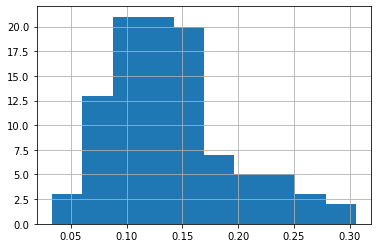

In [12]:
data[data.label==1]['LBP_GRAY_CH0_SC24+3_COUNTBINS26_NUMBIN25'].hist()

Проводим тест ANOVA и ранжируем признаки по p-уровню значимости:

In [13]:
f_score, f_pval = f_classif(X, y)
f_scores_data = pd.DataFrame(np.concatenate([np.expand_dims(f_score, -1), np.expand_dims(f_pval, -1)], axis=1),
                             columns=['f_score', 'pval'], index=X.columns)

D:\Anaconda\envs\myenv\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:114: UserWarning: Features [ 64  65  66  67  68  69  70  71  72  73  74  75  76  77  78  79 126 127
 128 129 130 131 132 133 134 135 136 137 138 139 140 141 188 189 190 191
 192 193 194 195 196 197 198 199 200 201 202 203 250 251 252 253 254 255
 256 257 258 259 260 261 262 263 264 265 312 313 314 315 316 317 318 319
 320 321 322 323 324 325 326 327 374 375 376 377 378 379 380 381 382 383
 384 385 386 387 388 389 436 437 438 439 440 441 442 443 444 445 446 447
 448 449 450 451 498 499 500 501 502 503 504 505 506 507 508 509 510 511
 512 513 560 561 562 563 564 565 566 567 568 569 570 571 572 573 574 575
 622 623 624 625 626 627 628 629 630 631 632 633 634 635 636 637] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx,
D:\Anaconda\envs\myenv\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:116: RuntimeWarning: invalid value encountered in true_d

In [14]:
f_scores_data.sort_values(ascending=True, by='pval').head()

,f_score,pval
LBP_YCR_CH2_SC24+3_COUNTBINS10_NUMBIN4,92.665469,3.095115e-18
LBP_YCR_CH2_SC24+3_COUNTBINS10_NUMBIN2,89.889458,8.084656e-18
LBP_YCR_CH2_SC24+3_COUNTBINS10_NUMBIN9,64.848023,7.407188e-14
LBP_GRAY_CH0_SC24+3_COUNTBINS10_NUMBIN8,57.162479,1.464460e-12
LBP_YCR_CH1_SC24+3_COUNTBINS10_NUMBIN4,49.830581,2.764822e-11


Сортируем признаки по p уровню значимости, фильтруем по пороговому значению для p, равному 0,05, если p уровень значимости для признака выше
порогового значения, то различия средних в двух выборках статистически не значимы.

In [15]:
f_scored_filtered_feat = list(f_scores_data[f_scores_data.pval < 0.05].index)
len(f_scored_filtered_feat)

265

После фильтрации осталось 265 признаков.

Проведем также bootstrap тест на сравнение медиан двух выборок для каждого признака.

In [16]:
import bootstrapped.bootstrap as bs
import bootstrapped.compare_functions as bs_compare
import bootstrapped.stats_functions as bs_stats

stat_significant = []
for feat in X.columns:
    feat_df = pd.concat([X[feat], y], axis=1)

    sample_1 = feat_df[feat_df.label == 1][feat].to_numpy()
    sample_2 = feat_df[feat_df.label == 0][feat].to_numpy()
    conf_interval =  bs.bootstrap_ab(
                                        sample_1,
                                        sample_2,
                                        stat_func=bs_stats.median,
                                        compare_func=bs_compare.difference,
                                        iteration_batch_size=None,
                                    )
    lower_bounder = conf_interval.lower_bound
    upper_bounder = conf_interval.upper_bound

    if (lower_bounder <= 0) & (upper_bounder>=0):
        stat_significant.append(0)
    else:
        stat_significant.append(1)

Построим табличку, где напротив признака стоит значение 1, если признак статистически значим по итогам проверки, иначе 0.

In [17]:
stat_significant_feat = pd.DataFrame(stat_significant, columns=['stat_significant'], index=X.columns)
stat_significant_feat[stat_significant_feat.stat_significant==1]

,stat_significant
WS_BGR_CH0_LH_std,1
WS_BGR_CH0_LH_mean,1
WS_BGR_CH0_HL_std,1
WS_BGR_CH0_HL_mean,1
WS_BGR_CH0_HH_std,1
...,...
LBP_GRAY_CH0_SC24+3_COUNTBINS26_NUMBIN17,1
LBP_GRAY_CH0_SC24+3_COUNTBINS26_NUMBIN18,1
LBP_GRAY_CH0_SC24+3_COUNTBINS26_NUMBIN19,1
LBP_GRAY_CH0_SC24+3_COUNTBINS26_NUMBIN24,1


Объединим таблицу с проверкой ANOVA и bootstrap, возьмем те признаки, которые показали стат. значимые различия на обоих
проверках.

In [18]:
union_stat_sign_feat = f_scores_data.join(stat_significant_feat, how='outer')
union_filtered_data = union_stat_sign_feat[(union_stat_sign_feat.pval < 0.05) & (union_stat_sign_feat.stat_significant == 1)].copy()

Таких признаков получилось 214

In [19]:
union_filtered_data

,f_score,pval,stat_significant
WS_BGR_CH0_LH_std,13.488286,0.000309,1
WS_BGR_CH0_LH_mean,9.488408,0.002362,1
WS_BGR_CH0_HL_std,7.970517,0.005240,1
WS_BGR_CH0_HL_mean,6.939006,0.009100,1
WS_BGR_CH0_HH_std,11.300919,0.000930,1
...,...,...,...
LBP_GRAY_CH0_SC24+3_COUNTBINS26_NUMBIN8,15.479275,0.000115,1
LBP_GRAY_CH0_SC24+3_COUNTBINS26_NUMBIN9,14.745406,0.000166,1
LBP_GRAY_CH0_SC24+3_COUNTBINS26_NUMBIN17,7.536150,0.006604,1
LBP_GRAY_CH0_SC24+3_COUNTBINS26_NUMBIN18,12.051555,0.000635,1


Функция ошибки *EqualErrorRate*:

In [20]:
from scipy.optimize import brentq
from scipy.interpolate import interp1d
from sklearn.metrics import roc_curve

def eer(y, y_score):
    fpr, tpr, thresholds = roc_curve(y, y_score, pos_label=1)

    eer = brentq(lambda x : 1. - x - interp1d(fpr, tpr)(x), 0., 1.)
#   thresh = interp1d(fpr, thresholds)(eer)
    return eer

Обучим случайный лес на всех признаках. Обучение проводится через *RandomizedSearchCV*, который случайным образом
выбирает параметры из возможных значений этого параметра, заданных в словаре *random_grid*, и выбирает тот набор
параметров, который показал лучшие значения по метрике *EER*

In [21]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import make_scorer
from sklearn.tree import DecisionTreeClassifier
eer_score = make_scorer(eer, greater_is_better=False)

def random_trees_feats_range(X_data):
    X_filtered = X_data
    X_train, X_test, y_train, y_test = train_test_split(X_filtered, y, test_size=.3,
                                                    random_state=42)

    n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
    max_features = ['auto', 'sqrt']
    max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
    max_depth.append(None)
    min_samples_split = [2, 5, 10]
    min_samples_leaf = [1, 2, 4]
    bootstrap = [True, False]

    random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

    clf = RandomForestClassifier(criterion='entropy', random_state=42)

    clf_random = RandomizedSearchCV(estimator = clf, param_distributions = random_grid,
                                n_iter = 100, cv = 5, verbose=2, random_state=42, n_jobs = -1)

    clf_random.fit(X_train, y_train)

    best_tree = clf_random.best_estimator_
    y_pred = best_tree.predict_proba(X_test)
    print('EER:', eer(y_test, y_pred[:,1]))
    print('Best params:', best_tree.get_params)

    range_feat_df = pd.DataFrame(best_tree.feature_importances_, index=X_filtered.columns, columns=['tree_feat_score']). \
                        sort_values(by='tree_feat_score', ascending=False)

    return best_tree, range_feat_df

Проведем ранжирование признаков для набора данных с признаками, прошедшими оба теста на стат. значимость:

In [22]:
X_filtered = X[union_filtered_data.index].copy()
_, range_feat_union_tests = random_trees_feats_range(X_filtered)
range_feat_union_tests

Fitting 5 folds for each of 100 candidates, totalling 500 fits
EER: 0.1034482758633613
Best params: <bound method BaseEstimator.get_params of RandomForestClassifier(criterion='entropy', max_depth=30, max_features='sqrt',
                       min_samples_split=5, n_estimators=400, random_state=42)>


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:   13.7s
[Parallel(n_jobs=-1)]: Done 138 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 341 tasks      | elapsed:  2.4min
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:  3.3min finished


,tree_feat_score
LBP_YCR_CH2_SC24+3_COUNTBINS10_NUMBIN2,0.048479
LBP_HSV_CH0_SC24+3_COUNTBINS10_NUMBIN3,0.021291
LBP_YCR_CH1_SC24+3_COUNTBINS10_NUMBIN2,0.020787
WS_HSV_CH1_LH_std,0.020718
LBP_YCR_CH1_SC24+3_COUNTBINS10_NUMBIN4,0.020227
...,...
LBP_GRAY_CH0_SC24+3_COUNTBINS26_NUMBIN4,0.000667
LBP_YCR_CH0_SC24+3_COUNTBINS26_NUMBIN4,0.000667
LBP_HSV_CH2_SC24+3_COUNTBINS10_NUMBIN4,0.000659
LBP_HSV_CH2_SC8+1_COUNTBINS26_NUMBIN4,0.000610


Проведем такое же ранжирование для набора данных с признаками, прошедшими только ANOVA или только bootstrap тесты,
и для полного набора данных

ANOVA:

In [23]:
_, range_feat_anova_test = random_trees_feats_range(X[f_scored_filtered_feat])
range_feat_anova_test

Fitting 5 folds for each of 100 candidates, totalling 500 fits
EER: 0.13793103448224714
Best params: <bound method BaseEstimator.get_params of RandomForestClassifier(bootstrap=False, criterion='entropy', max_depth=90,
                       min_samples_leaf=2, min_samples_split=5,
                       n_estimators=200, random_state=42)>


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:   10.1s
[Parallel(n_jobs=-1)]: Done 138 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 341 tasks      | elapsed:  2.3min
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:  3.2min finished


,tree_feat_score
LBP_YCR_CH2_SC24+3_COUNTBINS10_NUMBIN2,0.036403
LBP_YCR_CH1_SC24+3_COUNTBINS10_NUMBIN2,0.030749
LBP_YCR_CH2_SC24+3_COUNTBINS10_NUMBIN9,0.030651
WS_HSV_CH1_LH_std,0.022095
WS_HSV_CH1_HH_std,0.021177
...,...
WS_HSV_CH2_HH_mean,0.000292
LBP_BGR_CH0_SC24+3_COUNTBINS26_NUMBIN9,0.000270
LBP_YCR_CH2_SC24+3_COUNTBINS26_NUMBIN14,0.000214
LBP_HSV_CH1_SC8+1_COUNTBINS26_NUMBIN4,0.000182


Bootstrap:

In [24]:
_, range_feat_bs_test = random_trees_feats_range(X[stat_significant_feat[stat_significant_feat.stat_significant==1].index])
range_feat_bs_test

Fitting 5 folds for each of 100 candidates, totalling 500 fits
EER: 0.1290322580644908
Best params: <bound method BaseEstimator.get_params of RandomForestClassifier(criterion='entropy', max_depth=30, max_features='sqrt',
                       min_samples_split=5, n_estimators=400, random_state=42)>


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    9.6s
[Parallel(n_jobs=-1)]: Done 138 tasks      | elapsed:   58.4s
[Parallel(n_jobs=-1)]: Done 341 tasks      | elapsed:  2.2min
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:  3.2min finished


,tree_feat_score
LBP_YCR_CH2_SC24+3_COUNTBINS10_NUMBIN2,0.047690
LBP_YCR_CH1_SC24+3_COUNTBINS10_NUMBIN2,0.034488
WS_HSV_CH1_HL_std,0.020767
LBP_HSV_CH0_SC24+3_COUNTBINS10_NUMBIN3,0.020015
LBP_HSV_CH1_SC24+3_COUNTBINS10_NUMBIN8,0.019007
...,...
LBP_GRAY_CH0_SC24+3_COUNTBINS26_NUMBIN4,0.000435
LBP_BGR_CH2_SC8+1_COUNTBINS26_NUMBIN4,0.000317
LBP_HSV_CH2_SC8+1_COUNTBINS26_NUMBIN4,0.000313
LBP_YCR_CH0_SC24+3_COUNTBINS26_NUMBIN4,0.000101


Все признаки:

In [25]:
_, range_feat_all_test = random_trees_feats_range(X)
range_feat_all_test

Fitting 5 folds for each of 100 candidates, totalling 500 fits
EER: 0.10169491525469271
Best params: <bound method BaseEstimator.get_params of RandomForestClassifier(criterion='entropy', max_depth=50, max_features='sqrt',
                       n_estimators=200, random_state=42)>


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:   10.8s
[Parallel(n_jobs=-1)]: Done 138 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 341 tasks      | elapsed:  2.6min
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:  3.6min finished


,tree_feat_score
LBP_YCR_CH2_SC24+3_COUNTBINS10_NUMBIN2,0.029489
LBP_HSV_CH0_SC24+3_COUNTBINS10_NUMBIN3,0.026806
LBP_YCR_CH2_SC24+3_COUNTBINS10_NUMBIN9,0.017670
LBP_YCR_CH1_SC24+3_COUNTBINS10_NUMBIN2,0.017103
WS_HSV_CH1_HH_std,0.015156
...,...
LBP_YCR_CH0_SC8+1_COUNTBINS26_NUMBIN16,0.000000
LBP_YCR_CH0_SC8+1_COUNTBINS26_NUMBIN17,0.000000
LBP_YCR_CH0_SC8+1_COUNTBINS26_NUMBIN18,0.000000
LBP_YCR_CH0_SC8+1_COUNTBINS26_NUMBIN19,0.000000


Проведем обучение классификатора логистической регрессии с регуляризатором Lasso, свойством которого является зануление
признаков, параметры для обучения также подбираются по сетке.
Lasso:

In [39]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import  StandardScaler
import warnings
warnings.filterwarnings('ignore')
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3,
                                                    random_state=42)
stand_scaler = StandardScaler()
stand_scaler.fit(X_train)
X_stand_train = stand_scaler.transform(X_train)
X_stand_test = stand_scaler.transform(X_test)
log_reg = LogisticRegression(penalty='l1', random_state=0)
params = {'solver':['liblinear',  'saga'],
          'C': np.arange(0.1, 10.0, 0.5)}
clf = GridSearchCV(log_reg, param_grid=params, cv=5, scoring=eer_score)
clf.fit(X_stand_train, y_train)

log_reg = clf.best_estimator_
y_pred = log_reg.predict_proba(X_stand_test)
print('EER:', eer(y_test, y_pred[:,1]))

EER: 0.06896551724170247


Видим, что после обучения ненулевых признаков осталось 435:

In [40]:
log_reg_feat_imp = pd.DataFrame(log_reg.coef_[0,:], index=list(X.columns), columns=['logreg_score'])
log_reg_feat_imp[log_reg_feat_imp.logreg_score!=0].sort_values(by='logreg_score',ascending=False)

,logreg_score
LBP_HSV_CH1_SC24+3_COUNTBINS26_NUMBIN23,0.203620
LBP_HSV_CH1_SC24+3_COUNTBINS26_NUMBIN21,0.194898
LBP_YCR_CH2_SC24+3_COUNTBINS26_NUMBIN7,0.172682
LBP_YCR_CH2_SC24+3_COUNTBINS10_NUMBIN7,0.168229
LBP_HSV_CH1_SC24+3_COUNTBINS10_NUMBIN4,0.163318
...,...
LBP_GRAY_CH0_SC24+3_COUNTBINS10_NUMBIN8,-0.213748
LBP_HSV_CH0_SC24+3_COUNTBINS10_NUMBIN4,-0.252724
LBP_HSV_CH0_SC24+3_COUNTBINS10_NUMBIN3,-0.258912
LBP_YCR_CH2_SC24+3_COUNTBINS10_NUMBIN4,-0.291524


Составим общую таблицу для всех признаков, в которой в столбцах будут наименования значений значимости признаков для
каждого из использованных методов:

In [41]:
range_feat_table = range_feat_all_test.rename(columns={'tree_feat_score':'tree_all_feat_score'}). \
                    join([range_feat_union_tests.rename(columns={'tree_feat_score':'tree_union_feat_score'}),
                          range_feat_anova_test.rename(columns={'tree_feat_score':'tree_anova_feat_score'}),
                          range_feat_bs_test.rename(columns={'tree_feat_score':'tree_bs_feat_score'}),
                          log_reg_feat_imp], how='outer').copy()


In [42]:
range_feat_table = range_feat_table.reset_index().rename(columns={'index': 'feat_name'})
range_feat_table.head()

,feat_name,tree_all_feat_score,tree_union_feat_score,tree_anova_feat_score,tree_bs_feat_score,logreg_score
0,LBP_YCR_CH2_SC24+3_COUNTBINS10_NUMBIN2,0.029489,0.048479,0.036403,0.047690,-0.294471
1,LBP_HSV_CH0_SC24+3_COUNTBINS10_NUMBIN3,0.026806,0.021291,0.020208,0.020015,-0.258912
2,LBP_YCR_CH2_SC24+3_COUNTBINS10_NUMBIN9,0.017670,0.016579,0.030651,0.014707,0.157594
3,LBP_YCR_CH1_SC24+3_COUNTBINS10_NUMBIN2,0.017103,0.020787,0.030749,0.034488,-0.126870
4,WS_HSV_CH1_HH_std,0.015156,0.010267,0.021177,0.016935,0.153191


Пропущенные значения будут соответствовать 0:

In [43]:
range_feat_table.fillna(0, inplace=True)

Распарсим названия признаков, чтобы можно было группировать их по цветовой модели, дескриптору и т. д. :

In [44]:
range_feat_table['logreg_score'] = np.abs(range_feat_table.logreg_score)

range_feat_table['descriptor'] = range_feat_table['feat_name'].apply(lambda x: x.split('_')[0])

range_feat_table['color_map'] = range_feat_table['feat_name'].apply(lambda x: x.split('_')[1])

range_feat_table['color_channel'] = range_feat_table['feat_name'].apply(lambda x: x.split('_')[2])

range_feat_table['desc_params_lvl1'] = range_feat_table['feat_name'].apply(lambda x: x.split('_')[3])

range_feat_table['desc_params_lvl2'] = range_feat_table['feat_name'].apply(lambda x: x.split('_')[4])


In [45]:
def get_nbins(feat_name):
    try:
        return feat_name.split('_')[5]
    except:
        return np.NaN
range_feat_table['desc_params_lvl3'] = range_feat_table['feat_name'].apply(lambda x: get_nbins(x))
range_feat_table.head()

,feat_name,tree_all_feat_score,tree_union_feat_score,tree_anova_feat_score,tree_bs_feat_score,logreg_score,descriptor,color_map,color_channel,desc_params_lvl1,desc_params_lvl2,desc_params_lvl3
0,LBP_YCR_CH2_SC24+3_COUNTBINS10_NUMBIN2,0.029489,0.048479,0.036403,0.047690,0.294471,LBP,YCR,CH2,SC24+3,COUNTBINS10,NUMBIN2
1,LBP_HSV_CH0_SC24+3_COUNTBINS10_NUMBIN3,0.026806,0.021291,0.020208,0.020015,0.258912,LBP,HSV,CH0,SC24+3,COUNTBINS10,NUMBIN3
2,LBP_YCR_CH2_SC24+3_COUNTBINS10_NUMBIN9,0.017670,0.016579,0.030651,0.014707,0.157594,LBP,YCR,CH2,SC24+3,COUNTBINS10,NUMBIN9
3,LBP_YCR_CH1_SC24+3_COUNTBINS10_NUMBIN2,0.017103,0.020787,0.030749,0.034488,0.126870,LBP,YCR,CH1,SC24+3,COUNTBINS10,NUMBIN2
4,WS_HSV_CH1_HH_std,0.015156,0.010267,0.021177,0.016935,0.153191,WS,HSV,CH1,HH,std,NaN


Посмотрим на средние значения скоров для признаков в зависимости от их дескриптора:

In [46]:
res_table1=range_feat_table.groupby(['descriptor']).agg(np.mean).copy()
res_table1.to_excel("descriptor.xlsx",
             sheet_name='Sheet_name_1')
res_table1

,tree_all_feat_score,tree_union_feat_score,tree_anova_feat_score,tree_bs_feat_score,logreg_score
descriptor,,,,,
LBP,0.001330,0.001242,0.001282,0.001254,0.034473
WS,0.003243,0.004263,0.003801,0.004115,0.052401


Можно заметить, что в среднем вейвлет статистики имеют большее значение значимости, но следует
учитывать, что при расчете среднего LBP дескриптора учитывались значения каждого бина гистограммы, хотя
далеко не каждый из них имеет высокое значение значимости.

Посмотрим на средние значения в зависимости от цветовой модели признаков:

In [48]:
res_table2=range_feat_table.groupby(['color_map']).agg(np.mean).copy()
res_table2.to_excel("color_map.xlsx",
             sheet_name='Sheet_name_1')
res_table2

,tree_all_feat_score,tree_union_feat_score,tree_anova_feat_score,tree_bs_feat_score,logreg_score
color_map,,,,,
BGR,0.001062,0.001017,0.000929,0.001050,0.027848
GRAY,0.000954,0.000845,0.000827,0.000965,0.031512
HSV,0.001784,0.001725,0.001811,0.001744,0.041560
YCR,0.001766,0.001904,0.001910,0.001816,0.039656


В среднем наиболее значимыми оказали признаки на основе цветовых пространст HSV и YCrCb.

Посмотрим, на уровни значимости для каждого канала каждой из цветовых моделей признаков:

In [49]:
res_table3=range_feat_table.groupby(['color_map','color_channel']).agg(np.mean).copy()
res_table3.to_excel("color_map_channel.xlsx",
             sheet_name='Sheet_name_1')
res_table3

tree_all_feat_score  tree_union_feat_score  \
color_map color_channel                                               
BGR       CH0                       0.001029               0.000919   
          CH1                       0.001150               0.001185   
          CH2                       0.001008               0.000946   
GRAY      CH0                       0.000954               0.000845   
HSV       CH0                       0.001559               0.001249   
          CH1                       0.002490               0.003055   
          CH2                       0.001302               0.000870   
YCR       CH0                       0.001530               0.001116   
          CH1                       0.001366               0.001486   
          CH2                       0.002402               0.003111   

                         tree_anova_feat_score  tree_bs_feat_score  \
color_map color_channel                                              
BGR       CH0                         0.000881            0.000841   
          CH1                         0.001033            0.001310   
          CH2                         0.000874            0.000998   
GRAY      CH0                         0.000827            0.000965   
HSV       CH0                         0.001261            0.001132   
          CH1                         0.003187            0.003058   
          CH2                         0.000985            0.001041   
YCR       CH0                         0.001205            0.001019   
          CH1                         0.001501            0.001517   
          CH2                         0.003024            0.002910   

                         logreg_score  
color_map color_channel                
BGR       CH0                0.024963  
          CH1                0.032577  
          CH2                0.026005  
GRAY      CH0                0.031512  
HSV       CH0                0.036136  
          CH1                0.061612  
          CH2                0.026932  
YCR       CH0                0.028362  
          CH1                0.028814  
          CH2                0.061792

В среднем наиболее значимыми оказались признаки каналов Saturation (Насыщенность) для HSV и
Cb (Синия цветоразностная компонента) для YCrCb

Посмотрим, какие параметры дескрипторов оказались наиболее значимыми:

In [50]:
res_table4=range_feat_table.groupby(['descriptor','desc_params_lvl1']).agg(np.mean).copy()
res_table4.to_excel("desc_params_lvl1.xlsx",
             sheet_name='Sheet_name_1')
res_table4

tree_all_feat_score  tree_union_feat_score  \
descriptor desc_params_lvl1                                               
LBP        SC24+3                       0.001923               0.001817   
           SC8+1                        0.000510               0.000445   
WS         HH                           0.003760               0.003966   
           HL                           0.002687               0.003768   
           LH                           0.003283               0.005055   

                             tree_anova_feat_score  tree_bs_feat_score  \
descriptor desc_params_lvl1                                              
LBP        SC24+3                         0.001880            0.001852   
           SC8+1                          0.000453            0.000427   
WS         HH                             0.003599            0.004019   
           HL                             0.003193            0.004245   
           LH                             0.004610            0.004083   

                             logreg_score  
descriptor desc_params_lvl1                
LBP        SC24+3                0.048969  
           SC8+1                 0.014402  
WS         HH                    0.033344  
           HL                    0.076793  
           LH                    0.047066

Видим, что для LBP дескриптора параметры радиуса=3 и кол-ва точек=24 демонстрируют более высокие результаты.
Для вейвлет статистик более информативным оказалась горизонтальная высокочастотная компонента.

In [51]:
res_table5=range_feat_table.groupby(['descriptor','desc_params_lvl1', 'desc_params_lvl2']).agg(np.mean)
res_table5.to_excel("desc_params_lvl2.xlsx",
             sheet_name='Sheet_name_1')
res_table5

tree_all_feat_score  \
descriptor desc_params_lvl1 desc_params_lvl2                        
LBP        SC24+3           COUNTBINS10                  0.003843   
                            COUNTBINS26                  0.001185   
           SC8+1            COUNTBINS26                  0.000510   
WS         HH               mean                         0.001726   
                            std                          0.005794   
           HL               mean                         0.001790   
                            std                          0.003584   
           LH               mean                         0.002444   
                            std                          0.004121   

                                              tree_union_feat_score  \
descriptor desc_params_lvl1 desc_params_lvl2                          
LBP        SC24+3           COUNTBINS10                    0.003943   
                            COUNTBINS26                    0.000999   
           SC8+1            COUNTBINS26                    0.000445   
WS         HH               mean                           0.002048   
                            std                            0.005883   
           HL               mean                           0.002767   
                            std                            0.004769   
           LH               mean                           0.003085   
                            std                            0.007025   

                                              tree_anova_feat_score  \
descriptor desc_params_lvl1 desc_params_lvl2                          
LBP        SC24+3           COUNTBINS10                    0.004096   
                            COUNTBINS26                    0.001028   
           SC8+1            COUNTBINS26                    0.000453   
WS         HH               mean                           0.001264   
                            std                            0.005935   
           HL               mean                           0.001933   
                            std                            0.004453   
           LH               mean                           0.002266   
                            std                            0.006954   

                                              tree_bs_feat_score  logreg_score  
descriptor desc_params_lvl1 desc_params_lvl2                                    
LBP        SC24+3           COUNTBINS10                 0.004218      0.069065  
                            COUNTBINS26                 0.000942      0.041239  
           SC8+1            COUNTBINS26                 0.000427      0.014402  
WS         HH               mean                        0.001691      0.025102  
                            std                         0.006347      0.041586  
           HL               mean                        0.002663      0.081367  
                            std                         0.005826      0.072219  
           LH               mean                        0.002972      0.024787  
                            std                         0.005193      0.069345

Также можно заметить, что среди вейвелт статистик более информативной является стандартное отклонение.
А в LBP дескрипторе более детальная гистограмма с 26-ю бинами менее информативна, чем та же гистограмма с 10-ю бинами.
